In [114]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [115]:
data = pd.read_excel('./../data/raw/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

# Quality dataset analysis.

First aproach to asses its quality.

In [116]:
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [117]:
data.dtypes

PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object

In [118]:
data.dtypes.value_counts()

float64    225
int64        4
object       2
dtype: int64

In [119]:
data.shape

(1925, 231)

In [120]:
data.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Number of rows with null values

In [121]:
data.isnull().any(axis=1).sum()

1380

Perentage of empty values

In [122]:
(data.isnull().sum().sum()/np.product(data.shape)) * 100

50.34305953786473

In [123]:
data.isnull().all(axis=1).sum()

0

# Exploratory Data Analysis:

[Text(0.5, 0, 'Paciente en UCI'),
 Text(0, 0.5, 'Total'),
 Text(0.5, 1.0, 'Pacientes COVID-19 hospitalizados')]

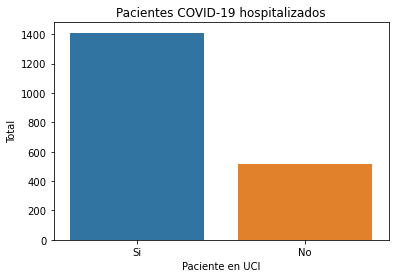

In [124]:
ax=sns.countplot(data=data, x='ICU')
ax.set_xticklabels(['Si', 'No'])
ax.set(xlabel= 'Paciente en UCI', ylabel='Total', title='Pacientes COVID-19 hospitalizados')

[Text(0.5, 0, 'Ventana temporal en horas'),
 Text(0, 0.5, 'Total'),
 Text(0.5, 1.0, 'Número registros de paciente por intervalo horario')]

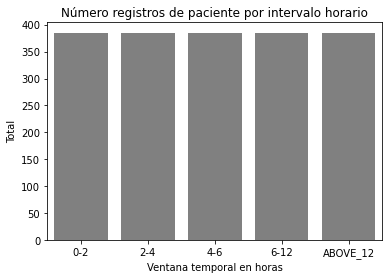

In [125]:
ax=sns.countplot(data=data, x=data['WINDOW'], color='grey')
ax.set(xlabel= 'Ventana temporal en horas', ylabel='Total', title='Número registros de paciente por intervalo horario')


[Text(0, 0, 'No'), Text(1, 0, 'Si')]

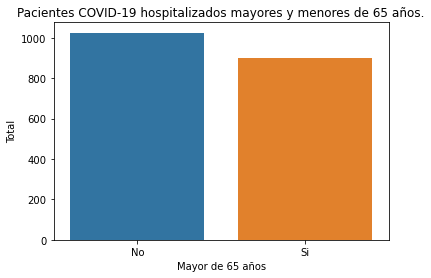

In [126]:
ax=sns.countplot(x='AGE_ABOVE65', data=data)
ax.set(xlabel= 'Mayor de 65 años', ylabel='Total', 
       title='Pacientes COVID-19 hospitalizados mayores y menores de 65 años.')
ax.set_xticklabels(['No', 'Si'])

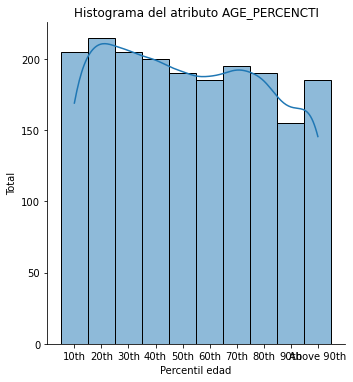

In [127]:
ax =sns.displot(x=sorted(data['AGE_PERCENTIL']), kde=True,legend=True)
ax.set(xlabel= 'Percentil edad', ylabel='Total', title='Histograma del atributo AGE_PERCENCTI')

[Text(0, 0, 'No'), Text(1, 0, 'Si')]

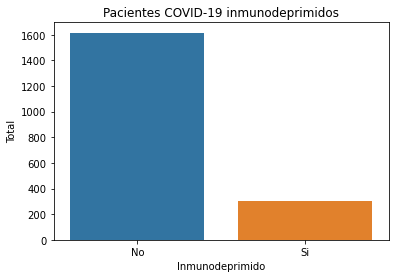

In [128]:
ax=sns.countplot(x='IMMUNOCOMPROMISED', data=data)
ax.set(xlabel= 'Inmunodeprimido', ylabel='Total', title='Pacientes COVID-19 inmunodeprimidos')
ax.set_xticklabels(['No', 'Si'])

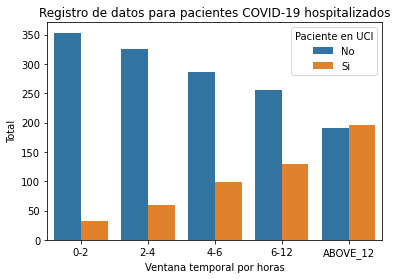

In [129]:

ax=sns.countplot(x="WINDOW", hue="ICU", data=data)
ax.set(xlabel= 'Ventana temporal por horas', ylabel='Total', title='Registro de datos para pacientes COVID-19 hospitalizados')
plt.legend(title='Paciente en UCI', labels=['No', 'Si'])

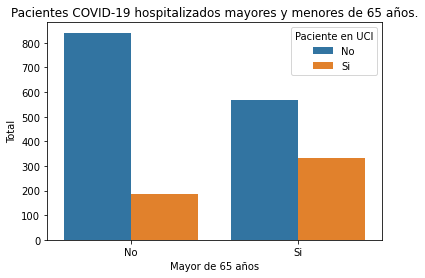

In [169]:
ax=sns.countplot(x='AGE_ABOVE65', hue='ICU', data=data)
ax.set_xticklabels(['No','Si'])
ax.set(xlabel= 'Mayor de 65 años', ylabel='Total', 
       title='Pacientes COVID-19 hospitalizados mayores y menores de 65 años.')
plt.legend(title='Paciente en UCI', labels=['No', 'Si'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '10th'),
  Text(1, 0, '20th'),
  Text(2, 0, '30th'),
  Text(3, 0, '40th'),
  Text(4, 0, '50th'),
  Text(5, 0, '60th'),
  Text(6, 0, '70th'),
  Text(7, 0, '80th'),
  Text(8, 0, '90th'),
  Text(9, 0, 'Above 90th')])

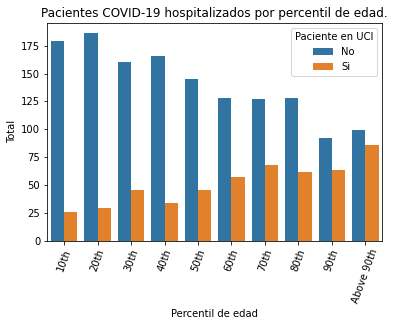

In [168]:
ax=sns.countplot(x="AGE_PERCENTIL", hue="ICU", data=data, order=sorted(data.AGE_PERCENTIL.unique()))
ax.set(xlabel= 'Percentil de edad', ylabel='Total', 
       title='Pacientes COVID-19 hospitalizados por percentil de edad.')
plt.legend(title='Paciente en UCI', labels=['No', 'Si'])
plt.xticks(rotation=70)

[Text(0, 0, 'No'), Text(1, 0, 'Si')]

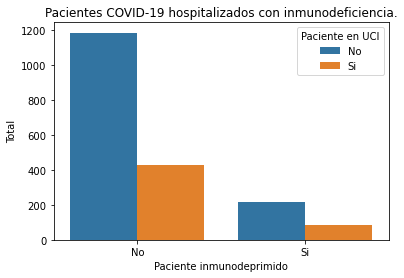

In [170]:
ax=sns.countplot(x="IMMUNOCOMPROMISED", hue="ICU", data=data)
ax.set(xlabel= 'Paciente inmunodeprimido', ylabel='Total', 
       title='Pacientes COVID-19 hospitalizados con inmunodeficiencia.')
plt.legend(title='Paciente en UCI', labels=['No', 'Si'])
ax.set_xticklabels(['No', 'Si'])

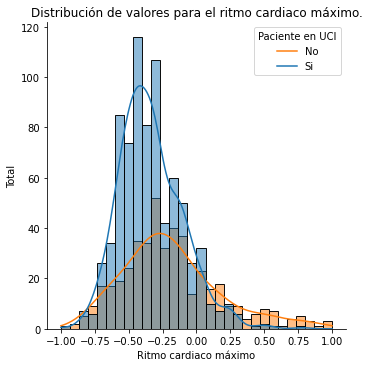

In [171]:
ax =sns.displot(x='HEART_RATE_MAX', hue='ICU', data=data, kde=True, legend=False)
ax.set(xlabel= 'Ritmo cardiaco máximo', ylabel='Total', 
       title='Distribución de valores para el ritmo cardiaco máximo.')
plt.legend(title='Paciente en UCI', labels=['No', 'Si'])


In [134]:
data.HEART_RATE_MAX.describe()

count    1240.000000
mean       -0.282029
std         0.296247
min        -1.000000
25%        -0.477612
50%        -0.328358
75%        -0.119403
max         1.000000
Name: HEART_RATE_MAX, dtype: float64

[Text(0.5, 0, 'Ritmo cardiaco máximo'),
 Text(0.5, 1.0, 'Diagrama de caja del ritmo cardiaco máximo')]

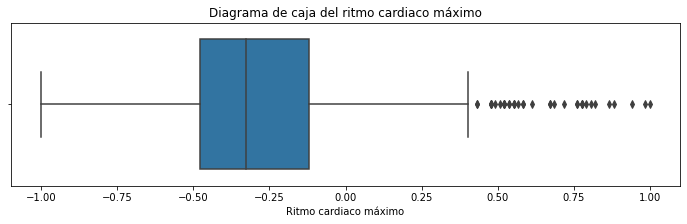

In [172]:
plt.figure(figsize=(12, 3))
ax = sns.boxplot(x='HEART_RATE_MAX', hue='ICU', data=data)
ax.set(xlabel='Ritmo cardiaco máximo', title='Diagrama de caja del ritmo cardiaco máximo')

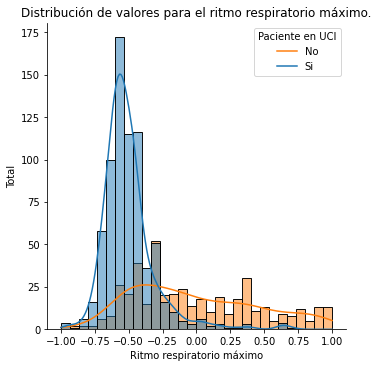

In [136]:
ax=sns.displot(x='RESPIRATORY_RATE_MAX', hue='ICU', data=data, kde=True, legend=False)
ax.set(xlabel= 'Ritmo respiratorio máximo', ylabel='Total', 
       title='Distribución de valores para el ritmo respiratorio máximo.')
plt.legend(title='Paciente en UCI', labels=['No', 'Si'])

In [137]:
data.RESPIRATORY_RATE_MAX.describe()

count    1177.000000
mean       -0.316753
std         0.402675
min        -1.000000
25%        -0.575758
50%        -0.454545
75%        -0.212121
max         1.000000
Name: RESPIRATORY_RATE_MAX, dtype: float64

[Text(0.5, 0, 'Frecuencia respiratoria máxima'),
 Text(0.5, 1.0, 'Diagrama de caja para la frecuencia respiratoria máxima')]

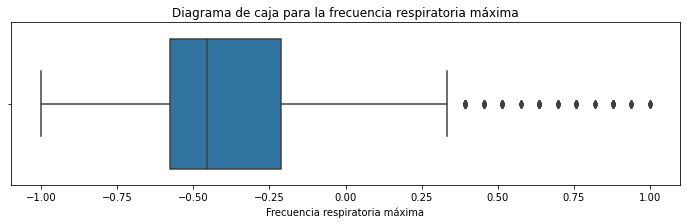

In [138]:
plt.figure(figsize=(12, 3))
ax = sns.boxplot(x='RESPIRATORY_RATE_MAX', hue='ICU', data=data)
ax.set(xlabel='Frecuencia respiratoria máxima', title='Diagrama de caja para la frecuencia respiratoria máxima')

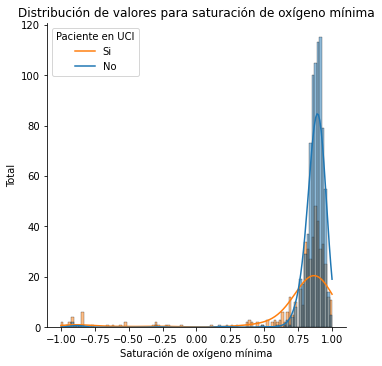

In [139]:
ax=sns.displot(data=data, x="OXYGEN_SATURATION_MIN", hue='ICU', kde=True, legend=False) 
ax.set(xlabel= 'Saturación de oxígeno mínima', ylabel='Total', 
       title='Distribución de valores para saturación de oxígeno mínima')
plt.legend(title='Paciente en UCI', labels=['Si','No'])

In [140]:
data.OXYGEN_SATURATION_MIN.describe()

count    1239.000000
mean        0.817565
std         0.283453
min        -1.000000
25%         0.818182
50%         0.878788
75%         0.919192
max         1.000000
Name: OXYGEN_SATURATION_MIN, dtype: float64

[Text(0.5, 0, 'Saturación de oxigeno mínima'),
 Text(0.5, 1.0, 'Diagrama de caja para la saturación de oxigeno mínima')]

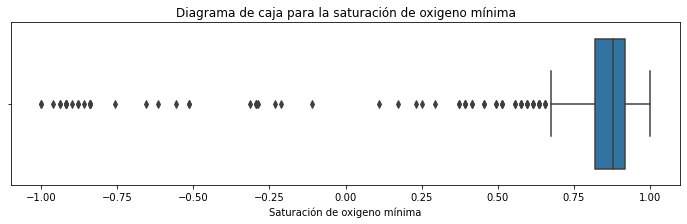

In [141]:
plt.figure(figsize=(12, 3))
ax = sns.boxplot(x='OXYGEN_SATURATION_MIN', hue='ICU', data=data)
ax.set(xlabel='Saturación de oxigeno mínima', title='Diagrama de caja para la saturación de oxigeno mínima')

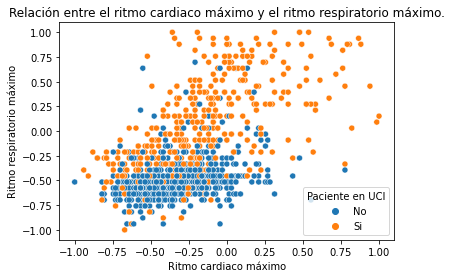

In [142]:
ax=sns.scatterplot(x='HEART_RATE_MAX', y='RESPIRATORY_RATE_MAX', hue='ICU', data=data)
ax.set(xlabel= 'Ritmo cardiaco máximo', ylabel='Ritmo respiratorio máximo', 
       title='Relación entre el ritmo cardiaco máximo y el ritmo respiratorio máximo.')

handles, labels  =  ax.get_legend_handles_labels()
plt.legend(title='Paciente en UCI', handles= handles, labels=['No', 'Si'])


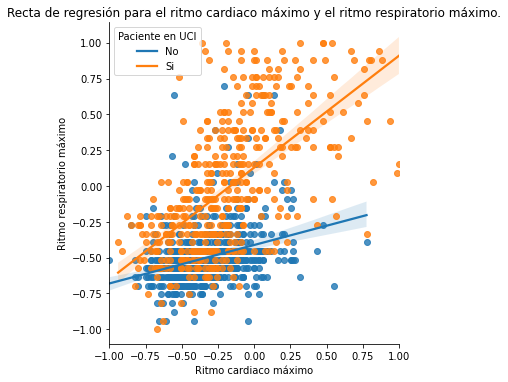

In [143]:
ax=sns.lmplot(x='HEART_RATE_MAX', y='RESPIRATORY_RATE_MAX', hue='ICU', data=data,legend=False);
ax.set(xlabel= 'Ritmo cardiaco máximo', ylabel='Ritmo respiratorio máximo', 
       title='Recta de regresión para el ritmo cardiaco máximo y el ritmo respiratorio máximo.')
plt.legend(title='Paciente en UCI',  labels=['No', 'Si'])

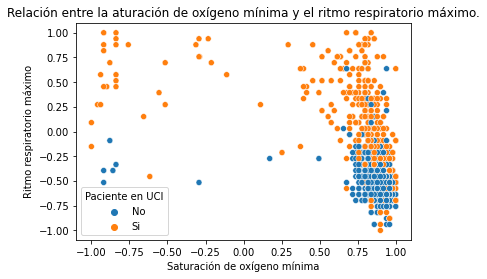

In [144]:
ax=sns.scatterplot(x='OXYGEN_SATURATION_MIN', y='RESPIRATORY_RATE_MAX', hue='ICU', data=data)
ax.set(xlabel= 'Saturación de oxígeno mínima', ylabel='Ritmo respiratorio máximo', 
       title='Relación entre la aturación de oxígeno mínima y el ritmo respiratorio máximo.')

handles, labels  =  ax.get_legend_handles_labels()
plt.legend(title='Paciente en UCI', handles= handles, labels=['No', 'Si'])


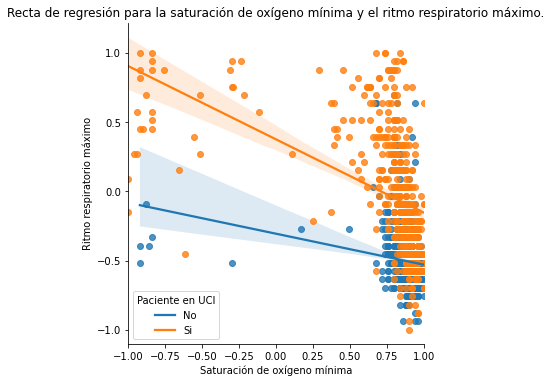

In [145]:
ax=sns.lmplot(x='OXYGEN_SATURATION_MIN', y='RESPIRATORY_RATE_MAX', hue='ICU', data=data, legend=False);
ax.set(xlabel= 'Saturación de oxígeno mínima', ylabel='Ritmo respiratorio máximo', 
       title='Recta de regresión para la saturación de oxígeno mínima y el ritmo respiratorio máximo.')
plt.legend(title='Paciente en UCI', labels=['No','Si'])

# Data preparation:

Data cleaning and preparation tasks. First we apply one hot encoding to string columns

In [146]:
data.dtypes[data.dtypes == object]

AGE_PERCENTIL    object
WINDOW           object
dtype: object

In [147]:
prepared_data = pd.get_dummies(data, columns=["AGE_PERCENTIL", "WINDOW"], prefix=["AGE_PERCENTIL", "WINDOW"])

In [148]:
prepared_data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1921,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1922,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1923,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


Next we are going to create an aux column in order to set the target atribute value to each patient's rows.

In [149]:
prepared_data['AUX_ICU'] = prepared_data['ICU']

In [150]:
group_prepared_data= prepared_data.groupby(by=prepared_data['PATIENT_VISIT_IDENTIFIER'])

In [151]:
group_prepared_data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AUX_ICU
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1921,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1922,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1923,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [152]:
group_prepared_data.get_group(0)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AUX_ICU
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,1


We set the final ICU value to all patient's previous rows, on this way we will be able to kwow whether a patient get in ICU or not on each row, so this will be the target attribute when building models. Then we fill missing values with the last known value as the dataset creator recomend.

In [153]:
final_data = pd.DataFrame()
for patient, frame in group_prepared_data:
    print('##################Patient {0}############################'.format(patient))
    print('##################ICU Previous values############################')
    print(frame['ICU'])
    print(frame.iloc[-1]['AUX_ICU'])
    frame['ICU'] =frame.iloc[-1]['AUX_ICU']
    print('##################ICU After values############################')
    print(frame['ICU'])
    print(frame.iloc[-1]['AUX_ICU'])
    #As recommended we fill null values with the last known value of each pacient
    frame.bfill(inplace=True)
    print('##################next iteration############################\n')
    
    final_data = final_data.append(frame)
    

    
    

##################Patient 0############################
##################ICU Previous values############################
0    0
1    0
2    0
3    0
4    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 1############################
##################ICU Previous values############################
5    1
6    1
7    1
8    1
9    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 2############################
##################ICU Previous values############################
10    0
11    0
12    0
13    0
14    1
Name: ICU, dtype: int64
1.0
##################ICU After values######

##################Patient 53############################
##################ICU Previous values############################
265    0
266    0
267    0
268    1
269    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
265    1.0
266    1.0
267    1.0
268    1.0
269    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 54############################
##################ICU Previous values############################
270    1
271    1
272    1
273    1
274    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
270    1.0
271    1.0
272    1.0
273    1.0
274    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 55############################
##################ICU Previous values############################
275    0
276    0
277    0
278    1
279    1
Name: ICU, dtype: in

510    1.0
511    1.0
512    1.0
513    1.0
514    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 103############################
##################ICU Previous values############################
515    0
516    1
517    1
518    1
519    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
515    1.0
516    1.0
517    1.0
518    1.0
519    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 104############################
##################ICU Previous values############################
520    1
521    1
522    1
523    1
524    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
520    1.0
521    1.0
522    1.0
523    1.0
524    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 105##########

##################Patient 154############################
##################ICU Previous values############################
770    0
771    0
772    0
773    0
774    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
770    0.0
771    0.0
772    0.0
773    0.0
774    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 155############################
##################ICU Previous values############################
775    0
776    0
777    0
778    1
779    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
775    1.0
776    1.0
777    1.0
778    1.0
779    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 156############################
##################ICU Previous values############################
780    0
781    0
782    1
783    1
784    1
Name: ICU, dtype:

Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 201############################
##################ICU Previous values############################
1005    0
1006    0
1007    1
1008    1
1009    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
1005    1.0
1006    1.0
1007    1.0
1008    1.0
1009    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 202############################
##################ICU Previous values############################
1010    1
1011    1
1012    1
1013    1
1014    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
1010    1.0
1011    1.0
1012    1.0
1013    1.0
1014    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 203############################
################

1225    0
1226    0
1227    0
1228    0
1229    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
1225    1.0
1226    1.0
1227    1.0
1228    1.0
1229    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 246############################
##################ICU Previous values############################
1230    0
1231    0
1232    0
1233    0
1234    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1230    0.0
1231    0.0
1232    0.0
1233    0.0
1234    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 247############################
##################ICU Previous values############################
1235    0
1236    0
1237    0
1238    0
1239    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1235    0.0
1236    0.0
1

##################next iteration############################

##################Patient 289############################
##################ICU Previous values############################
1445    0
1446    0
1447    1
1448    1
1449    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
1445    1.0
1446    1.0
1447    1.0
1448    1.0
1449    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 290############################
##################ICU Previous values############################
1450    0
1451    0
1452    0
1453    0
1454    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1450    0.0
1451    0.0
1452    0.0
1453    0.0
1454    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 291############################
##################ICU Previous values#########

##################Patient 331############################
##################ICU Previous values############################
1655    0
1656    0
1657    0
1658    0
1659    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1655    0.0
1656    0.0
1657    0.0
1658    0.0
1659    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 332############################
##################ICU Previous values############################
1660    0
1661    0
1662    0
1663    0
1664    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1660    0.0
1661    0.0
1662    0.0
1663    0.0
1664    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 333############################
##################ICU Previous values############################
1665    0
1666    0
1667    0
1668    0
16

##################Patient 378############################
##################ICU Previous values############################
1890    0
1891    0
1892    0
1893    0
1894    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1890    0.0
1891    0.0
1892    0.0
1893    0.0
1894    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 379############################
##################ICU Previous values############################
1895    1
1896    1
1897    1
1898    1
1899    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
1895    1.0
1896    1.0
1897    1.0
1898    1.0
1899    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 380############################
##################ICU Previous values############################
1900    0
1901    0
1902    0
1903    0
19

In [154]:
final_data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AUX_ICU
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,1


In [155]:
final_data.to_excel('./../data/intermediate/intermediate_ICU_Prediction.xlsx', index=False)

Checking null values after data treating

In [156]:
final_data.isnull().any(axis=1).sum()

39

In [157]:
(final_data.isnull().sum().sum()/np.product(data.shape)) * 100

1.6292798110979931

In [158]:
final_data[final_data.isnull().any(axis=1)]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AUX_ICU
212,42,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
213,42,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
214,42,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
371,74,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
372,74,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
373,74,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
374,74,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
939,187,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,1,0
995,199,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
996,199,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


Only 39 rows with missing data, what means around 1% of rows, so we decice to remove them.

In [159]:
final_data = final_data.dropna()

In [160]:
final_data.isnull().any(axis=1).sum()

0

Now, we remove the measures taken when the pacient were on ICU service because it hasn't sense to use them for building a predictive model for UCI admission.

In [161]:
final_data = final_data[final_data['AUX_ICU']!=1]

In [162]:
final_data[final_data['AUX_ICU']==1]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AUX_ICU


Lastly we remove non meaning col such as patient ID or the aux ICU col

In [163]:
final_data.drop(['PATIENT_VISIT_IDENTIFIER', 'AUX_ICU'], axis=1, inplace=True)

In [164]:
final_data.tail(1)

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,...,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12
1924,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


[Text(0.5, 0, 'Paciente en UCI'),
 Text(0, 0.5, 'Total'),
 Text(0.5, 1.0, 'Pacientes COVID-19 hospitalizados')]

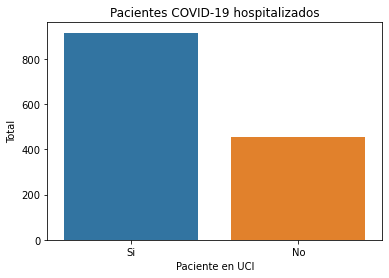

In [165]:
ax=sns.countplot(data=final_data, x='ICU')
ax.set_xticklabels(['Si', 'No'])
ax.set(xlabel= 'Paciente en UCI', ylabel='Total', title='Pacientes COVID-19 hospitalizados')

In [166]:
final_data['ICU'].mean()

0.3323615160349854

So, we obtain a 33% of ICU rows instead of 23% of the raw data.

In [167]:
final_data.to_excel('./../data/prepared/prepared_ICU_Prediction.xlsx',index=False)